In [106]:
#import the packages:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [107]:
#read the dataset:
fraud = pd.read_csv('payment_fraud.csv')
fraud.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


## Preprocessing

In [108]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [109]:
fraud.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


In [110]:
#duplicate values in the dataset
fraud.duplicated().sum()

3033

In [111]:
fraud.duplicated().sum()/len(fraud)*100

7.73310216465669

In [112]:
#drop the duplicate rows:
fraud_unique=fraud.drop_duplicates()

In [113]:
#build a separate model with this unique data
fraud_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36188 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        36188 non-null  int64  
 1   numItems              36188 non-null  int64  
 2   localTime             36188 non-null  float64
 3   paymentMethod         36188 non-null  object 
 4   paymentMethodAgeDays  36188 non-null  float64
 5   Category              36093 non-null  object 
 6   isWeekend             35792 non-null  float64
 7   label                 36188 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ MB


In [114]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [115]:
#find the unique values in the columns to check for minor errors:
for i in fraud.columns:
    print('***********',i,'************')
    print()
    print(set(fraud[i].to_list()))
    print()

*********** accountAgeDays ************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

### 1.missing value treatement

In [116]:
fraud.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [117]:
fraud['isWeekend'].value_counts()

0.0    19348
1.0    19313
Name: isWeekend, dtype: int64

In [118]:
#checking isweekend's missing values with respect to label
fw=fraud[fraud['label']==1]['isWeekend']
print(fw.isna().sum())
fw.count

560


<bound method Series.count of 109     NaN
243     NaN
280     NaN
362     NaN
420     NaN
         ..
38830   NaN
38880   NaN
39005   NaN
39111   NaN
39183   NaN
Name: isWeekend, Length: 560, dtype: float64>

In [119]:
#All the missing values of 'isweekend', aligned with 'label''s category of 'fraud' i.e.1. so filling this would make false model. so drop this variable
fraud= fraud.drop(['isWeekend'],axis=1)

In [120]:
fraud['Category'].value_counts()

shopping       13328
food           12964
electronics    12834
Name: Category, dtype: int64

In [121]:
#filling missing value with most frequent data
fraud['Category']=fraud['Category'].fillna('shopping')

In [122]:
fraud['Category'].value_counts()

shopping       13423
food           12964
electronics    12834
Name: Category, dtype: int64

In [123]:
fraud.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
label                   0
dtype: int64

In [124]:
#fraud transaction's avg. paymentmethodagedays 
fw=fraud[fraud['label']==1]['paymentMethodAgeDays']
fw.mean()

0.01247643843571427

### distribution of the dataset

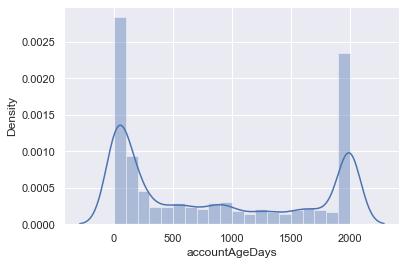

<Figure size 432x288 with 0 Axes>

In [125]:
#find the distribution of the dataset
fig1 = sns.distplot(fraud['accountAgeDays'])
plt.savefig('distplot11.png', dpi=300,pad_inches='tight')
plt.show()
plt.draw()


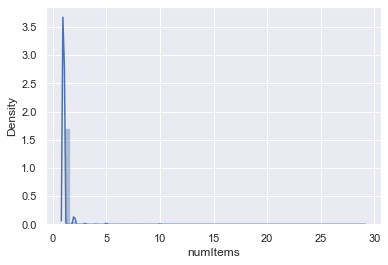

<Figure size 432x288 with 0 Axes>

In [126]:
fig1 = sns.distplot(fraud['numItems'])
plt.savefig('distplot22.png', dpi=300,pad_inches='tight')
plt.show()
plt.draw()

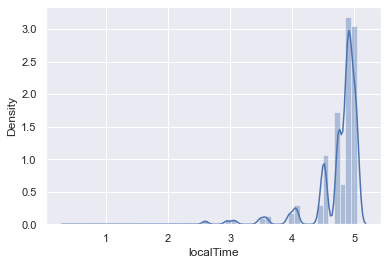

<Figure size 432x288 with 0 Axes>

In [127]:
fig1 = sns.distplot(fraud['localTime'])
plt.savefig('distplot33.png', dpi=300,pad_inches='tight')
plt.show()
plt.draw()

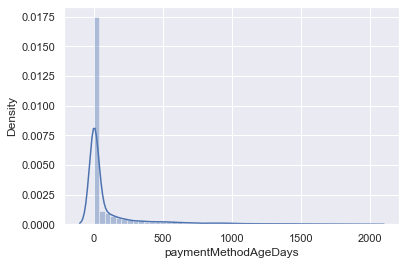

<Figure size 432x288 with 0 Axes>

In [128]:
fig1 = sns.distplot(fraud['paymentMethodAgeDays'])
plt.savefig('distplot44.png', dpi=300,pad_inches='tight')
plt.show()
plt.draw()

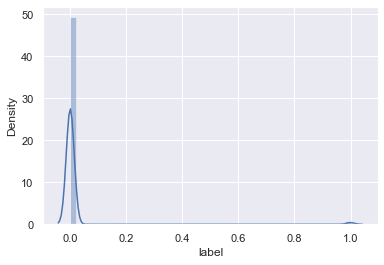

<Figure size 432x288 with 0 Axes>

In [129]:
fig1 = sns.distplot(fraud['label'])
plt.savefig('distplot66.png', dpi=300,pad_inches='tight')
plt.show()
plt.draw()

### outliers in the dataset

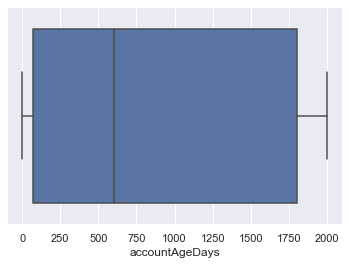

In [130]:
#find the outliers in the dataset
sns.boxplot(fraud['accountAgeDays'])
plt.savefig('outlier11.png', dpi=300,pad_inches='tight')
plt.show()

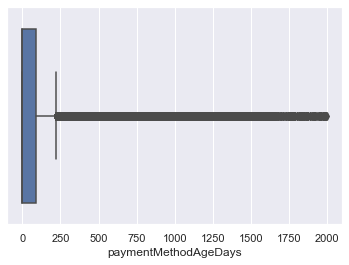

In [131]:
sns.boxplot(fraud['paymentMethodAgeDays'])
plt.savefig('outlier22.png', dpi=300,pad_inches='tight')
plt.show()

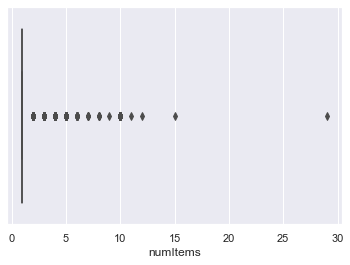

In [132]:
sns.boxplot(fraud['numItems'])
plt.savefig('outlier33.png', dpi=300,pad_inches='tight')
plt.show()

### 2. Encoding part

In [133]:
fraud.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,paypal,28.204861,shopping,0
1,725,1,4.742303,storecredit,0.000000,electronics,0
2,845,1,4.921318,creditcard,0.000000,food,0
3,503,1,4.886641,creditcard,0.000000,electronics,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0


In [134]:
fraud['paymentMethod'].value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

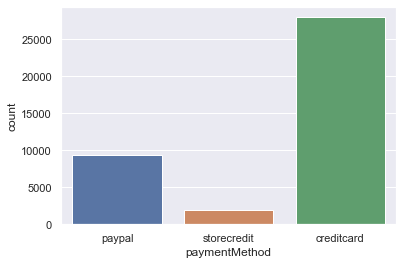

In [135]:
sns.countplot(fraud['paymentMethod'])
plt.savefig('paymentmethod1.png', dpi=300,pad_inches='tight')
plt.show()

In [136]:
fraud['Category'].value_counts()

shopping       13423
food           12964
electronics    12834
Name: Category, dtype: int64

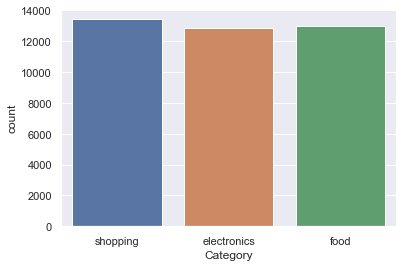

In [137]:
sns.countplot(fraud['Category'])
plt.savefig('category1.png', dpi=300,pad_inches='tight')
plt.show()

In [138]:
#one hot encoder on both these columns:
fraud = pd.get_dummies(fraud, columns=['paymentMethod','Category'])
fraud.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,0,1,0,0,0,1
1,725,1,4.742303,0.000000,0,0,0,1,1,0,0
2,845,1,4.921318,0.000000,0,1,0,0,0,1,0
3,503,1,4.886641,0.000000,0,1,0,0,1,0,0
4,2000,1,5.040929,0.000000,0,1,0,0,0,0,1


In [139]:
fraud = fraud.drop(['paymentMethod_creditcard','Category_electronics'],axis=1)
fraud.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,1,0,0,1
1,725,1,4.742303,0.000000,0,0,1,0,0
2,845,1,4.921318,0.000000,0,0,0,1,0
3,503,1,4.886641,0.000000,0,0,0,0,0
4,2000,1,5.040929,0.000000,0,0,0,0,1


### 3.feature scaling

In [140]:
#before feature scaling split the data into x and y:
x = fraud.drop(['label'],axis=1)
y = fraud[['label']]

In [141]:
#feature scaling:Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)
x = pd.DataFrame(x1,columns=x.columns)
x.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,-1.029556,-0.1495,-0.007268,-0.333032,1.793308,-0.226504,-0.702663,1.386335
1,-0.164721,-0.1495,-0.015227,-0.432497,-0.557629,4.414934,-0.702663,-0.721326
2,-0.015612,-0.1495,0.444546,-0.432497,-0.557629,-0.226504,1.423158,-0.721326
3,-0.440574,-0.1495,0.355484,-0.432497,-0.557629,-0.226504,-0.702663,-0.721326
4,1.419567,-0.1495,0.751749,-0.432497,-0.557629,-0.226504,-0.702663,1.386335


### 5.Imbalance dataset

In [142]:
#balance the dependent variable:
y.value_counts()

label
0        38661
1          560
dtype: int64

In [143]:
import imblearn
from imblearn.over_sampling import SMOTE
ros = SMOTE()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print(y_ros.value_counts())

label
0        38661
1          560
dtype: int64
label
0        38661
1        38661
dtype: int64


In [144]:
xy = pd.concat([x_ros,y_ros], axis=1)
xy.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping,label
0,-1.029556,-0.1495,-0.007268,-0.333032,1.793308,-0.226504,-0.702663,1.386335,0
1,-0.164721,-0.1495,-0.015227,-0.432497,-0.557629,4.414934,-0.702663,-0.721326,0
2,-0.015612,-0.1495,0.444546,-0.432497,-0.557629,-0.226504,1.423158,-0.721326,0
3,-0.440574,-0.1495,0.355484,-0.432497,-0.557629,-0.226504,-0.702663,-0.721326,0
4,1.419567,-0.1495,0.751749,-0.432497,-0.557629,-0.226504,-0.702663,1.386335,0


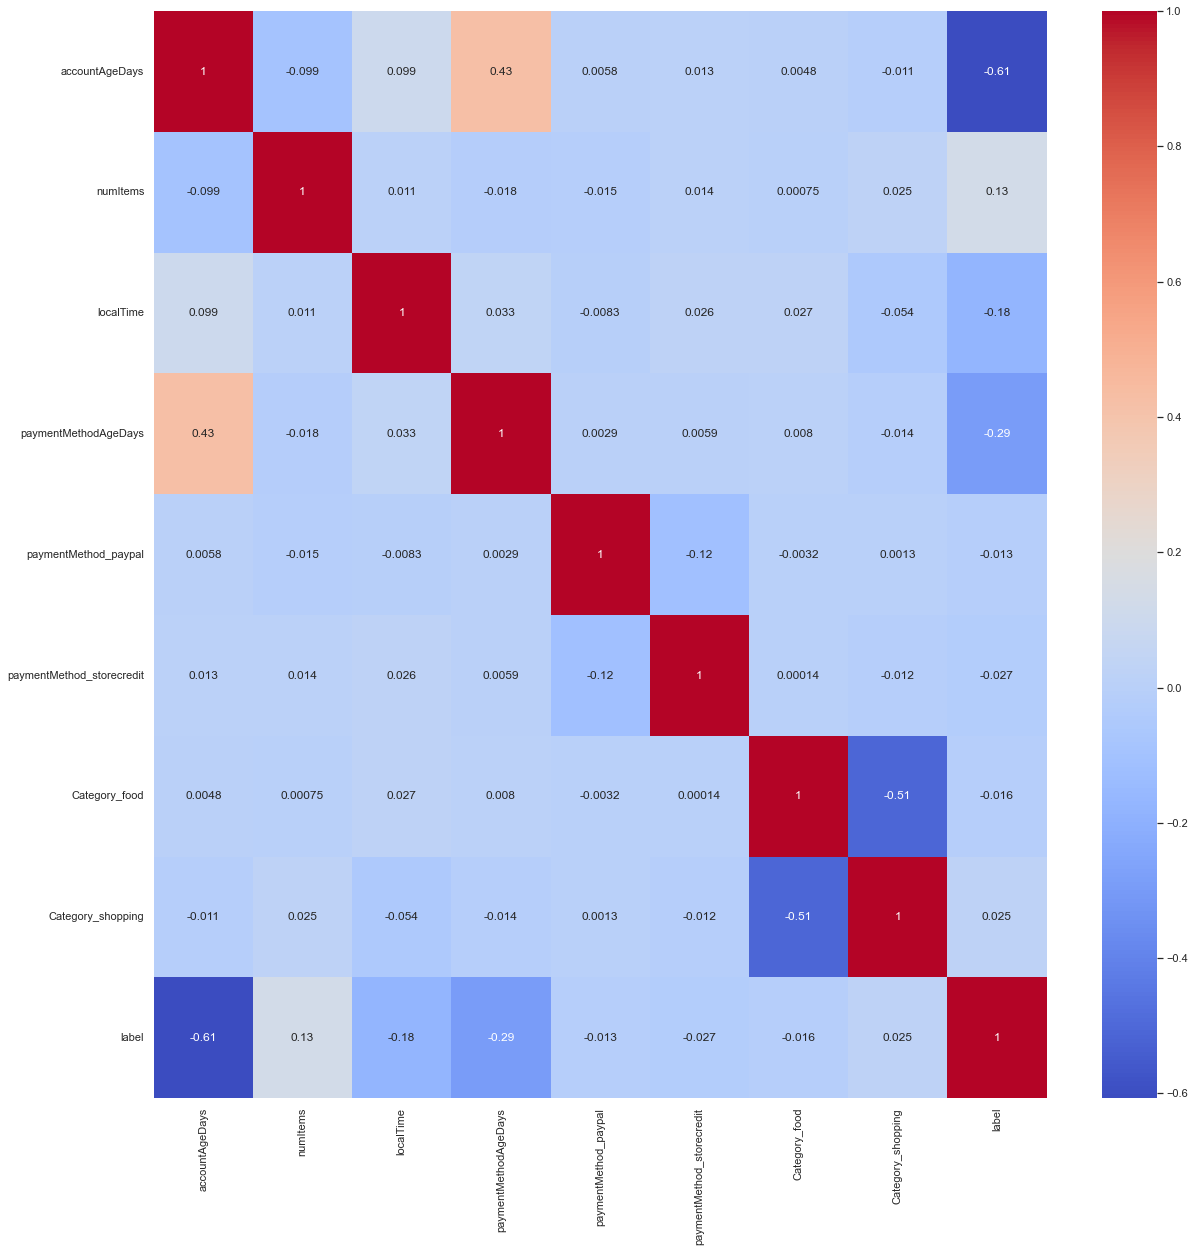

In [145]:
#finding correlation:
plt.figure(figsize=(20,20))
corr = xy.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.savefig('corr111.png',dpi=300)

### Priciple Component Analysis

In [146]:
#PCA
from sklearn.decomposition import PCA

In [147]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_ros)
print(x_ros.shape)
print(x_pca.shape)

(77322, 8)
(77322, 7)


### Model Building

In [148]:
# Split the data into training and test for model building
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_ros, test_size=0.3, random_state=101)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [150]:
# Applying all the model together

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier 
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)             
                             
# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr) 

In [151]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [152]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression  0.929775
1            DecisionTree  0.994310
2            RandomForest  0.996810
3                 Bagging  0.995258
4                Adaboost  0.906152
5        GradientBoosting  0.935940
6                 XGBoost  0.987283
7           SupportVector  0.910592
8       KNearestNeighbors  0.990904
9      NaiveBayesGaussian  0.745700
10  NaiveBayesBernoullies  0.716903
11       VotingClassifier  0.968789
AxesSubplot(0.125,0.125;0.775x0.755)


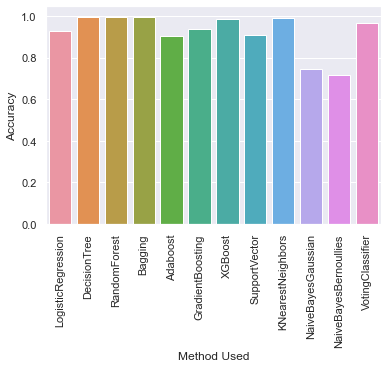

In [153]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
plt.savefig('accuracy1.png', dpi=300,bbox_inches='tight')
print(charts)

In [154]:
# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf_train = rfmodel.predict(x_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
y_pred_rf_test = rfmodel.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print(accuracy_rf_train)
print(accuracy_rf_test)

1.0
0.9969392593869897


In [155]:
rf.feature_importances_

array([0.10571802, 0.05452304, 0.28025891, 0.12370276, 0.15201719,
       0.21605779, 0.06772229])

In [156]:
# RandomForest(oob_score=True)
rfmodel = RandomForestClassifier(max_depth=7,bootstrap=True,oob_score=True)
rf1 = rfmodel.fit(x_train, y_train)
y_pred_rf_train1 = rfmodel.predict(x_train)
accuracy_rf_train1 = accuracy_score(y_train, y_pred_rf_train1)
y_pred_rf_test1 = rfmodel.predict(x_test)
accuracy_rf_test1 = accuracy_score(y_test, y_pred_rf_test1)
print(accuracy_rf_train1)
print(accuracy_rf_test1)

0.9199076212471131
0.9213691425615381


In [157]:
# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg_train = bagg.predict(x_train)
accuracy_bg_train= accuracy_score(y_train, y_pred_bg_train)
y_pred_bg_test = bagg.predict(x_test)
accuracy_bg_test = accuracy_score(y_test, y_pred_bg_test)
print(accuracy_bg_train)
print(accuracy_bg_test)

0.9996859122401848
0.9954735526145623


In [158]:
# XGBClassifier
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg_train= xgb.predict(x_train)
accuracy_xg_train = accuracy_score(y_train, y_pred_xg_train)

y_pred_xg_test = xgb.predict(x_test)
accuracy_xg_test = accuracy_score(y_test, y_pred_xg_test)
print(accuracy_xg_train)
print(accuracy_xg_test)

0.9909099307159354
0.9872828382980557


In [159]:
# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn_train = knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
y_pred_knn_test = knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print(accuracy_knn_train)
print(accuracy_knn_test)

0.9946235565819861
0.990903996206406


### Model Evaluation

In [160]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

### classification report-check precision,recall,f1-score

In [161]:
#random forest
print( classification_report(y_train, y_pred_rf_train))
print("***********"*10)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27130
           1       1.00      1.00      1.00     26995

    accuracy                           1.00     54125
   macro avg       1.00      1.00      1.00     54125
weighted avg       1.00      1.00      1.00     54125

**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11531
           1       1.00      1.00      1.00     11666

    accuracy                           1.00     23197
   macro avg       1.00      1.00      1.00     23197
weighted avg       1.00      1.00      1.00     23197



In [162]:
#random forest1
print( classification_report(y_train, y_pred_rf_train1))
print("***********"*10)
print(classification_report(y_test, y_pred_rf_test1))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     27130
           1       0.86      1.00      0.93     26995

    accuracy                           0.92     54125
   macro avg       0.93      0.92      0.92     54125
weighted avg       0.93      0.92      0.92     54125

**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     11531
           1       0.87      1.00      0.93     11666

    accuracy                           0.92     23197
   macro avg       0.93      0.92      0.92     23197
weighted avg       0.93      0.92      0.92     23197



In [163]:
#bagging classifier
print( classification_report(y_train, y_pred_bg_train))
print("***********"*10)
print(classification_report(y_test, y_pred_bg_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27130
           1       1.00      1.00      1.00     26995

    accuracy                           1.00     54125
   macro avg       1.00      1.00      1.00     54125
weighted avg       1.00      1.00      1.00     54125

**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11531
           1       1.00      1.00      1.00     11666

    accuracy                           1.00     23197
   macro avg       1.00      1.00      1.00     23197
weighted avg       1.00      1.00      1.00     23197



In [164]:
#xg boost
print( classification_report(y_train, y_pred_xg_train))
print("***********"*10)
print(classification_report(y_test, y_pred_xg_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     27130
           1       0.98      1.00      0.99     26995

    accuracy                           0.99     54125
   macro avg       0.99      0.99      0.99     54125
weighted avg       0.99      0.99      0.99     54125

**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11531
           1       0.98      1.00      0.99     11666

    accuracy                           0.99     23197
   macro avg       0.99      0.99      0.99     23197
weighted avg       0.99      0.99      0.99     23197



In [165]:
#knn
print( classification_report(y_train, y_pred_knn_train))
print("***********"*10)
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27130
           1       0.99      1.00      0.99     26995

    accuracy                           0.99     54125
   macro avg       0.99      0.99      0.99     54125
weighted avg       0.99      0.99      0.99     54125

**************************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11531
           1       0.99      0.99      0.99     11666

    accuracy                           0.99     23197
   macro avg       0.99      0.99      0.99     23197
weighted avg       0.99      0.99      0.99     23197



### confusion matrix- check type2 error

In [166]:
#confusion_matrix-Random Forest
cm_train_rf =  confusion_matrix(y_train, y_pred_rf_train, labels=rf.classes_)
cm_test_rf = confusion_matrix(y_test, y_pred_rf_test, labels=rf.classes_)
print(cm_train_rf)
print("***********"*10)
print(cm_test_rf)

[[27130     0]
 [    0 26995]]
**************************************************************************************************************
[[11489    42]
 [   29 11637]]


<Figure size 1440x1440 with 0 Axes>

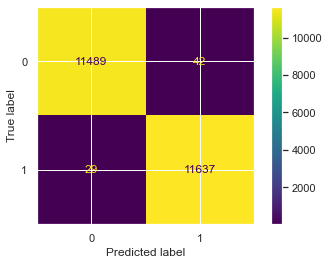

In [167]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test_rf,  display_labels=rf.classes_)

plt.figure(figsize=(20,20))
cm_display.plot()
plt.savefig('confusion11.png', dpi=300,bbox_inches='tight')
plt.show()

In [168]:
#confusion_matrix-Random Forest1
cm_train_rf1 =  confusion_matrix(y_train, y_pred_rf_train1, labels=rf1.classes_)
cm_test_rf1 = confusion_matrix(y_test, y_pred_rf_test1, labels=rf1.classes_)
print(cm_train_rf1)
print("***********"*10)
print(cm_test_rf1)

[[22802  4328]
 [    7 26988]]
**************************************************************************************************************
[[ 9715  1816]
 [    8 11658]]


<Figure size 1440x1440 with 0 Axes>

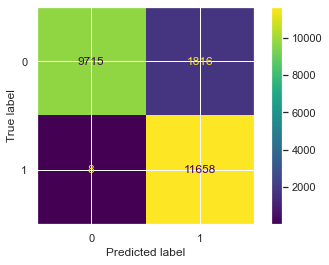

In [169]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_test_rf1,  display_labels=rf1.classes_)

plt.figure(figsize=(20,20))
cm_display.plot()
plt.savefig('confusion11.png', dpi=300,bbox_inches='tight')
plt.show()

In [170]:
#confusion_matrix-Bagging classifier
cm_train_bg =  confusion_matrix(y_train, y_pred_bg_train, labels=bg.classes_)
cm_test_bg = confusion_matrix(y_test, y_pred_bg_test, labels=bg.classes_)
print(cm_train_bg)
print("***********"*10)
print(cm_test_bg)

[[27123     7]
 [   10 26985]]
**************************************************************************************************************
[[11477    54]
 [   51 11615]]


<Figure size 1440x1440 with 0 Axes>

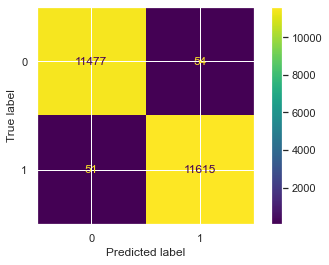

In [171]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm_test_bg,  display_labels=bg.classes_)

plt.figure(figsize=(20,20))
cm_display.plot()
plt.savefig('confusion11.png', dpi=300,bbox_inches='tight')
plt.show()

In [172]:
#confusion_matrix-xg boost
cm_train_xg =  confusion_matrix(y_train, y_pred_xg_train, labels=xg.classes_)
cm_test_xg = confusion_matrix(y_test, y_pred_xg_test, labels=xg.classes_)
print(cm_train_xg)
print("***********"*10)
print(cm_test_xg)

[[26682   448]
 [   44 26951]]
**************************************************************************************************************
[[11284   247]
 [   48 11618]]


<Figure size 1440x1440 with 0 Axes>

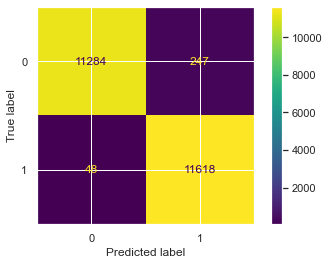

In [173]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm_test_xg,  display_labels=xg.classes_)

plt.figure(figsize=(20,20))
cm_display.plot()
plt.savefig('confusion11.png', dpi=300,bbox_inches='tight')
plt.show()

In [174]:
#confusion_matrix-knn
cm_train_knn =  confusion_matrix(y_train, y_pred_knn_train, labels=knn.classes_)
cm_test_knn = confusion_matrix(y_test, y_pred_knn_test, labels=knn.classes_)
print(cm_train_knn)
print("***********"*10)
print(cm_test_knn)

[[26903   227]
 [   64 26931]]
**************************************************************************************************************
[[11388   143]
 [   68 11598]]


<Figure size 1440x1440 with 0 Axes>

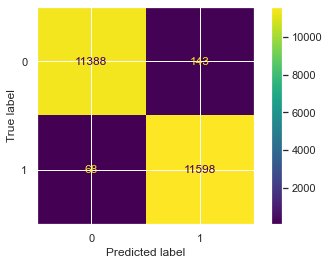

In [175]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm_test_knn,  display_labels=knn.classes_)

plt.figure(figsize=(20,20))
cm_display.plot()
plt.savefig('confusion11.png', dpi=300,bbox_inches='tight')
plt.show()

### out of these rf,bg,xg,knn models rf has low type-2 error. so I go with rf model.

### roc-auc curve 

In [176]:
#check roc-auc score for rf_model
from sklearn.metrics import roc_auc_score
logit_roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)
logit_roc_auc_test

0.9969358941377668

In [177]:
logit_roc_auc_train = roc_auc_score(y_train, y_pred_rf_train)
logit_roc_auc_train

1.0

In [178]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.00364236, 1.        ])

array([0.        , 0.99751414, 1.        ])

array([inf,  1.,  0.])

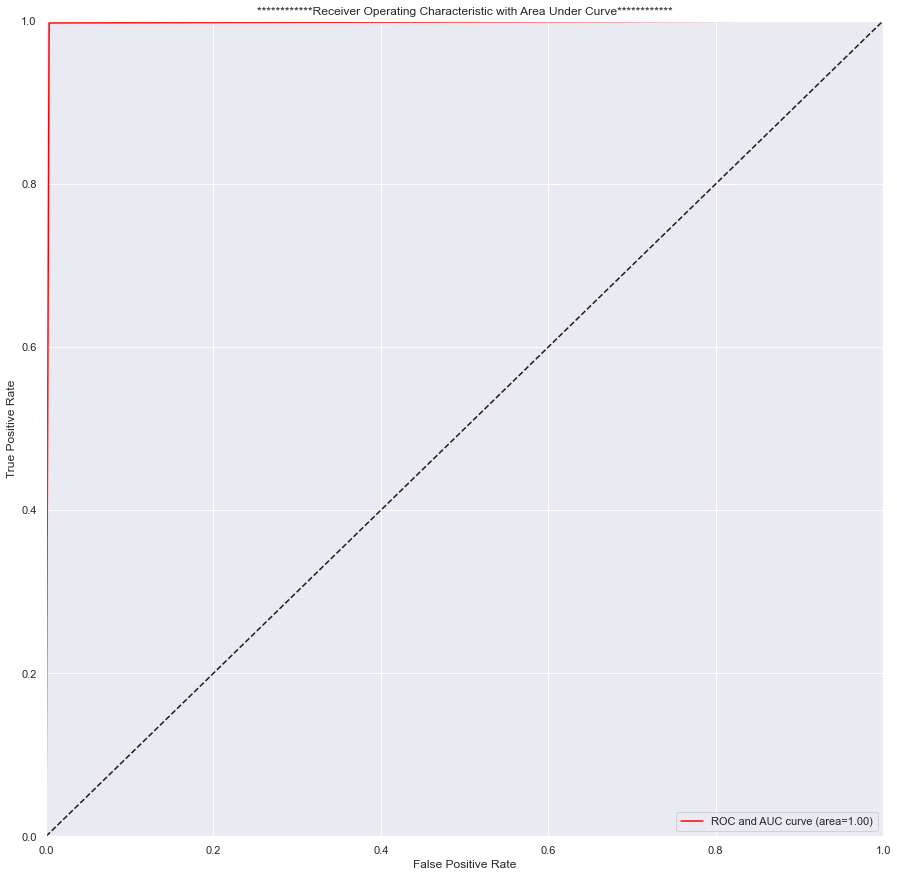

In [179]:
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % logit_roc_auc_test,color='red')
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("************Receiver Operating Characteristic with Area Under Curve************")
plt.legend(loc='lower right')
plt.savefig('roc_auc1.png', dpi=300,bbox_inches='tight')
plt.show()

### Cross Validation

In [180]:
from sklearn.model_selection import cross_val_score
cv_training_accuracy = cross_val_score(rf, x_train, y_train, cv=15)
cv_test_accuracy = cross_val_score(rf, x_test, y_test, cv=15)
print(cv_training_accuracy)
print(cv_test_accuracy)

[0.99695206 0.99501247 0.99695206 0.99612081 0.99501247 0.99556541
 0.99501109 0.99611973 0.99584257 0.99279379 0.99667406 0.99584257
 0.99556541 0.99584257 0.99584257]
[0.99224305 0.99030381 0.99224305 0.98901099 0.99030381 0.99095023
 0.99159664 0.9915912  0.98641656 0.99094437 0.99353169 0.99288486
 0.99223803 0.99223803 0.99353169]


In [181]:
print('final training accuracy:',round(np.mean(cv_training_accuracy)*100,2))
print('final test accuracy:',round(np.mean(cv_test_accuracy)*100,2))

final training accuracy: 99.57
final test accuracy: 99.13
